In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


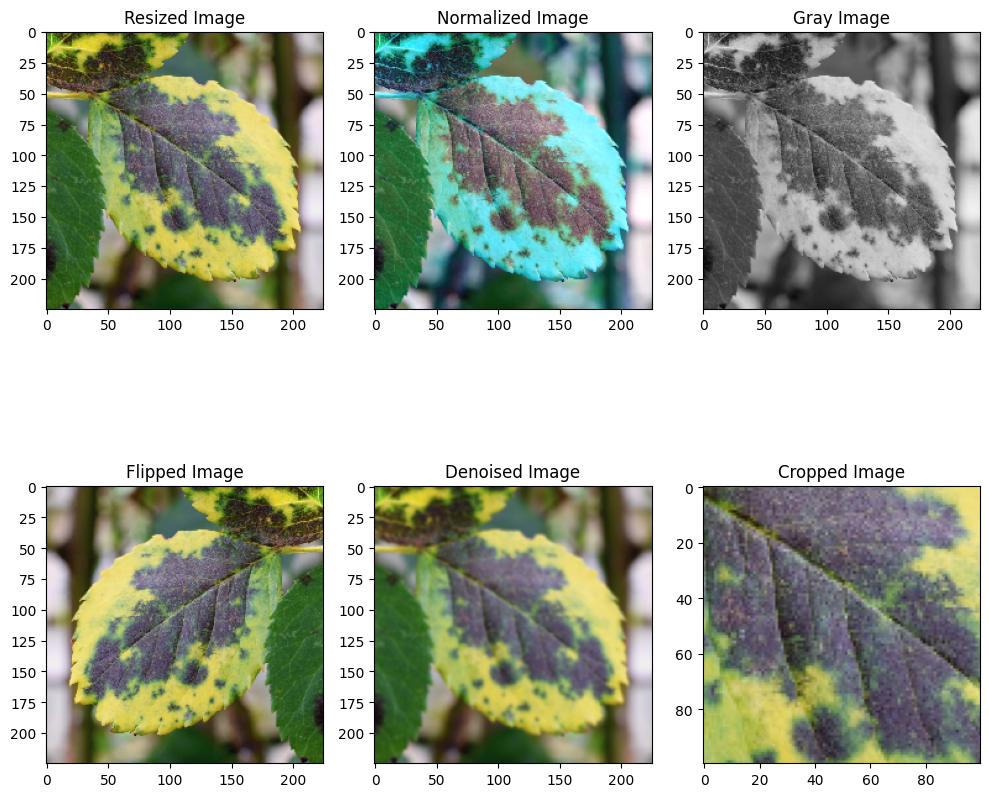

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Update image path with the correct path.
image_path = '/content/drive/MyDrive/black spot Diplocarpon'

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Image not found or failed to load.")
else:
    # Resize the image
    resized_image = cv2.resize(image, (225, 225))

    # Normalize the image
    normalized_image = resized_image / 230.0

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Flip the image horizontally
    flipped_image = cv2.flip(resized_image, 1)

    # Apply Gaussian blur for denoising
    denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)

    # Get image dimensions
    height, width = resized_image.shape[:2]

    # Crop the image
    crop_size = 100
    cropped_image = resized_image[
        height // 2 - crop_size // 2 : height // 2 + crop_size // 2,
        width // 2 - crop_size // 2 : width // 2 + crop_size // 2,
    ]
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)), plt.title("Resized Image")
    plt.subplot(2, 3, 2), plt.imshow(normalized_image), plt.title("Normalized Image")
    plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)), plt.title("Gray Image")
    plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB)), plt.title("Flipped Image")
    plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)), plt.title("Denoised Image")
    plt.subplot(2, 3, 6), plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)), plt.title("Cropped Image")
    plt.tight_layout()
    plt.show()